In [1]:
# 1. Load a Dataset

In [3]:
# Perform imports and load the dataset: 
import pandas as pd

In [5]:
df = pd.read_csv("Processed_Reviews.csv",encoding="ISO-8859-1", usecols=['lemmatized', 'tokenized', 'label'])
df.shape

(13, 3)

In [7]:
df.head()

,lemmatized,tokenized,label
0,product arrive time packaging great quality am...,"['product', 'arrive', 'time', 'packaging', 'gr...",1
1,product amaze love,"['product', 'amaze', 'love']",1
2,buy phone hz display totally worth,"['buy', 'phone', 'hz', 'display', 'totally', '...",1
3,wow product awesome bit expensive,"['wow', 'product', 'awesome', 'bit', 'expensive']",1
4,laptop work perfectly fine,"['laptop', 'work', 'perfectly', 'fine']",1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lemmatized  13 non-null     object
 1   tokenized   13 non-null     object
 2   label       13 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 444.0+ bytes


In [11]:
# Checking for null values 
df.isnull().sum()

lemmatized    0
tokenized     0
label         0
dtype: int64

In [13]:
# Checking Duplicate values 
df.duplicated().sum()

0

In [15]:
# 2. Vectorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vect = TfidfVectorizer() 


X = tfidf_vect.fit_transform(df['lemmatized']) 
y = df['label']

In [19]:
# 3. Modeling

In [21]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split

In [23]:
# Split data into train & test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# Naive Bayes 
nb_clf = MultinomialNB().fit(X_train, y_train)

In [27]:
# 4. Performance Evaluation

In [29]:
# Performance metrics comparison
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score # Importing accuracy_score 

# Naive Bayes 
nb_predicted = nb_clf.predict(X_test) 
nb_report = classification_report(y_test, nb_predicted, zero_division=0) 

# Calculate error rate for Naive Bayes 
nb_error_rate = 1 - accuracy_score(y_test, nb_predicted) 
nb_cm = confusion_matrix(y_test, nb_predicted)


In [31]:
nb_cm

array([[0, 1],
       [0, 3]], dtype=int64)

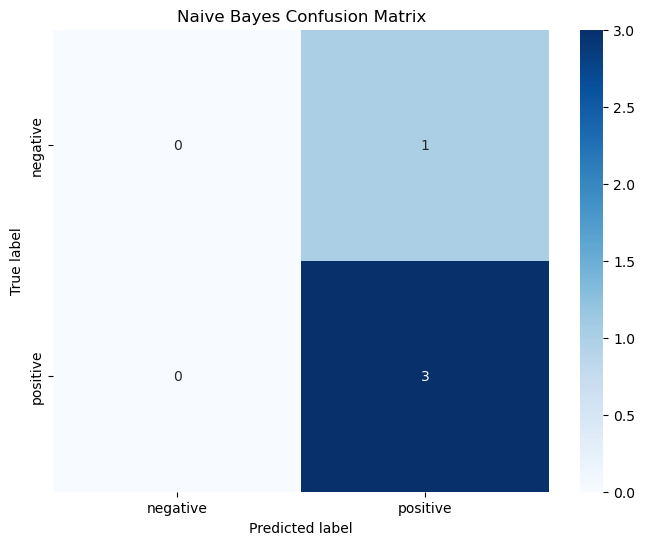

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4


Naive Bayes Error Rate: 0.25


In [33]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Function to plot confusion matrix 
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues): 
    plt.figure(figsize=(8, 6)) 
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes) 
    plt.title(title) 
    plt.xlabel('Predicted label') 
    plt.ylabel('True label') 
    plt.show() 

# Plot confusion matrix for Naive Bayes 
plot_confusion_matrix(nb_cm, classes=['negative', 'positive'], title='Naive Bayes Confusion Matrix')

print("Naive Bayes Classifier Report:") 
print(nb_report) 
print(f"\nNaive Bayes Error Rate: {nb_error_rate:.2f}") 